<a href="https://colab.research.google.com/github/realnihal/Predicting-stock-prices-using-ml/blob/main/FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#**Getting** **basic** data

In [2]:
start = datetime(1999, 3, 9)
end = datetime.today()
yahoo = web.DataReader('AMZN','yahoo',start=start,end=end)
yahoo.info
data = yahoo

In [3]:
data.to_csv('DATA.csv')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-03-09,66.62500,61.71875,62.5625,64.96875,16292000.0,64.96875
1999-03-10,69.46875,67.00000,68.3750,68.56250,14117600.0,68.56250
1999-03-11,71.37500,65.50000,69.8750,67.43750,16252200.0,67.43750
1999-03-12,67.68750,64.31250,67.0000,66.65625,9332600.0,66.65625
1999-03-15,69.50000,65.50000,66.5000,69.46875,7020800.0,69.46875


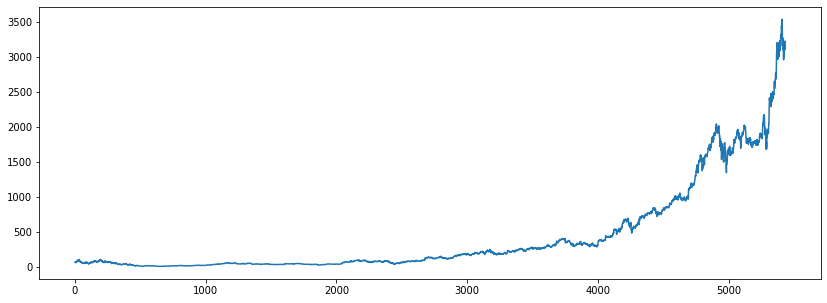

In [4]:
df = data.reset_index()['Close']
plt.figure(figsize = (14,5))
plt.plot(df)
plt.show()

#**Getting more fundamental data**